In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

In [ ]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [ ]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [ ]:
df = pd.merge(customers, transactions, on='CustomerID')
df.head()

,CustomerID,CustomerName,Region,SignupDate,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,C0001,Lawrence Carroll,South America,2022-07-10,T00015,P054,2024-01-19 03:12:55,2,114.60,57.30
1,C0001,Lawrence Carroll,South America,2022-07-10,T00932,P022,2024-09-17 09:01:18,3,412.62,137.54
2,C0001,Lawrence Carroll,South America,2022-07-10,T00085,P096,2024-04-08 00:01:00,2,614.94,307.47
3,C0001,Lawrence Carroll,South America,2022-07-10,T00445,P083,2024-05-07 03:11:44,2,911.44,455.72
4,C0001,Lawrence Carroll,South America,2022-07-10,T00436,P029,2024-11-02 17:04:16,3,1300.92,433.64


In [ ]:
df = df.groupby(['CustomerID','Region']).agg({'ProductID': 'count', 'TotalValue':'sum'}).reset_index()
df.head()

,CustomerID,Region,ProductID,TotalValue
0,C0001,South America,5,3354.52
1,C0002,Asia,4,1862.74
2,C0003,South America,4,2725.38
3,C0004,South America,8,5354.88
4,C0005,Asia,3,2034.24


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  1000 non-null   object 
 1   Region      1000 non-null   object 
 2   ProductID   1000 non-null   object 
 3   TotalValue  1000 non-null   float64
dtypes: float64(1), object(3)
memory usage: 31.4+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Region'] = le.fit_transform(df['Region'])
df['CustomerID'] = le.fit_transform(df['CustomerID'])
df['ProductID'] = le.fit_transform(df['ProductID'])
df.head()

,CustomerID,Region,ProductID,TotalValue
0,0,3,4,3354.52
1,1,0,3,1862.74
2,2,3,3,2725.38
3,3,3,7,5354.88
4,4,0,2,2034.24


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['TotalValue'] = scaler.fit_transform(df[['TotalValue']])
df.head()

,CustomerID,Region,ProductID,TotalValue
0,0,3,4,-0.061701
1,1,0,3,-0.877744
2,2,3,3,-0.405857
3,3,3,7,1.032547
4,4,0,2,-0.783929


In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

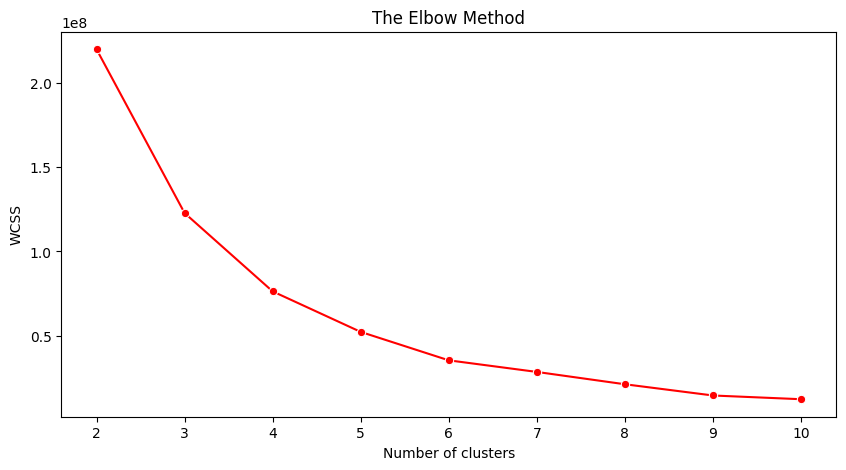

In [ ]:
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

elbow_data = pd.DataFrame({'Number of Clusters': range(2, 11), 'WCSS': wcss})

plt.figure(figsize=(10, 5))
sns.lineplot(x='Number of Clusters', y='WCSS', data=elbow_data, marker='o', color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)

In [ ]:
kmeans.fit(df)

KMeans(n_clusters=4, random_state=42)

In [ ]:
labels = kmeans.labels_

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
db = davies_bouldin_score(df, labels)
print(db)

0.5179836990833663


In [ ]:
silhouette = silhouette_score(df, labels)
print(silhouette)

0.5498930988891911


In [ ]:
data = df.copy()
data['Labels'] = labels
data.head()

,CustomerID,Region,TransactionID,TotalValue,Labels
0,0,3,5,-0.061701,2
1,1,0,4,-0.877744,2
2,2,3,4,-0.405857,2
3,3,3,8,1.032547,2
4,4,0,3,-0.783929,2


In [ ]:
import plotly.express as px

fig = px.scatter(data,
                 x='TotalValue',
                 y='TransactionID',
                 color='Labels',
                 title = 'Ecommerce customers Segmentation',
                 template = 'plotly_dark')
fig.show()

In [ ]:
fig = px.scatter_3d(data,
                    x='TotalValue',
                    y='Region',
                    z='TransactionID',
                    color='Labels',
                    symbol='Labels',
                    opacity=0.7,
                    size_max=10,
                    template='plotly_dark')

fig.update_layout(
    title={
        'text': "Ecommerce Customer Segmentation",
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    scene=dict(
        xaxis=dict(title='TotalValue'),
        yaxis=dict(title='Region'),
        zaxis=dict(title='TransactionID')),
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="white"))

fig.show()